In [ ]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('spam.csv', encoding = ('ISO-8859-1'))


In [42]:
df.shape

(5583, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5583 non-null   object
 1   v2          5583 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.2+ KB


In [44]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [45]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
df.drop(columns=['Unnamed: 2','Unnamed: 3' ,'Unnamed: 4'],inplace=True)

In [47]:
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df.shape

(5583, 2)

In [49]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
df.duplicated().sum()

403

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [52]:
df['target']=encoder.fit_transform(df['target'])

In [53]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df=df.drop_duplicates(keep='first')

In [55]:
df.duplicated().sum()

0

In [56]:
df.shape

(5180, 2)

# EDA

In [57]:
df['target'].value_counts()

0    4516
1     664
Name: target, dtype: int64

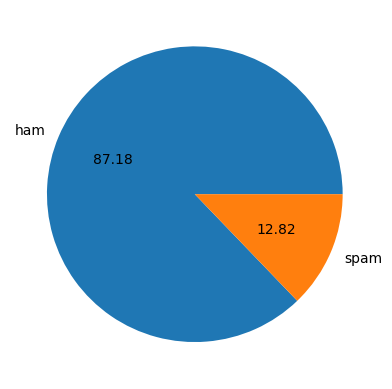

In [58]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [59]:
import nltk

In [60]:
df['num_character']=df['text'].apply(len)

In [61]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [63]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
df['num_sentance']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [65]:
df.head()

,target,text,num_character,num_word,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:
df[['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,5180.000000,5180.000000,5180.000000
mean,78.985135,18.451737,1.963514
std,58.187790,13.312506,1.447685
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.500000,15.000000,1.000000
75%,116.250000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
df[df['target']==0][['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [68]:
df[df['target']==1][['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,664.000000,664.000000,664.000000
mean,136.971386,27.483434,2.938253
std,30.911016,7.117397,1.497342
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [69]:
import seaborn as sns

<AxesSubplot: xlabel='num_character', ylabel='Count'>

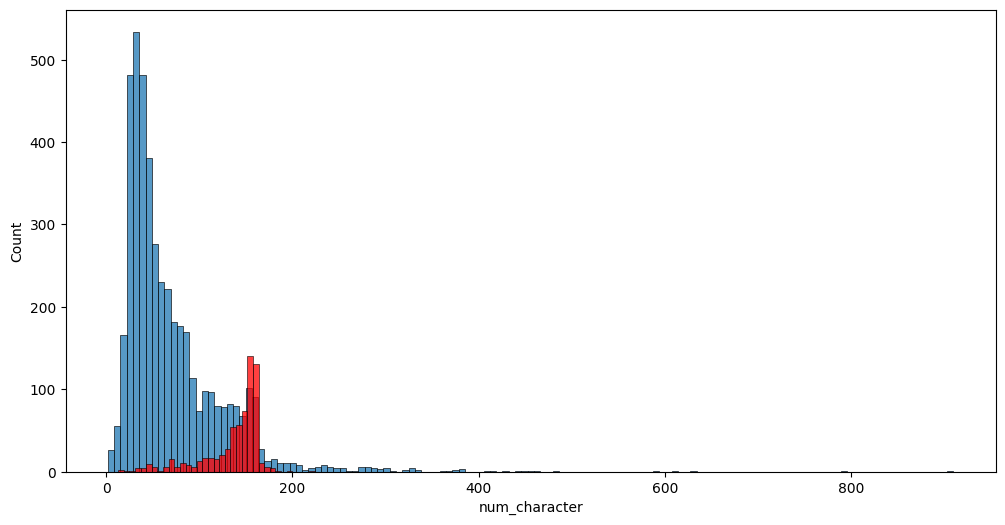

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

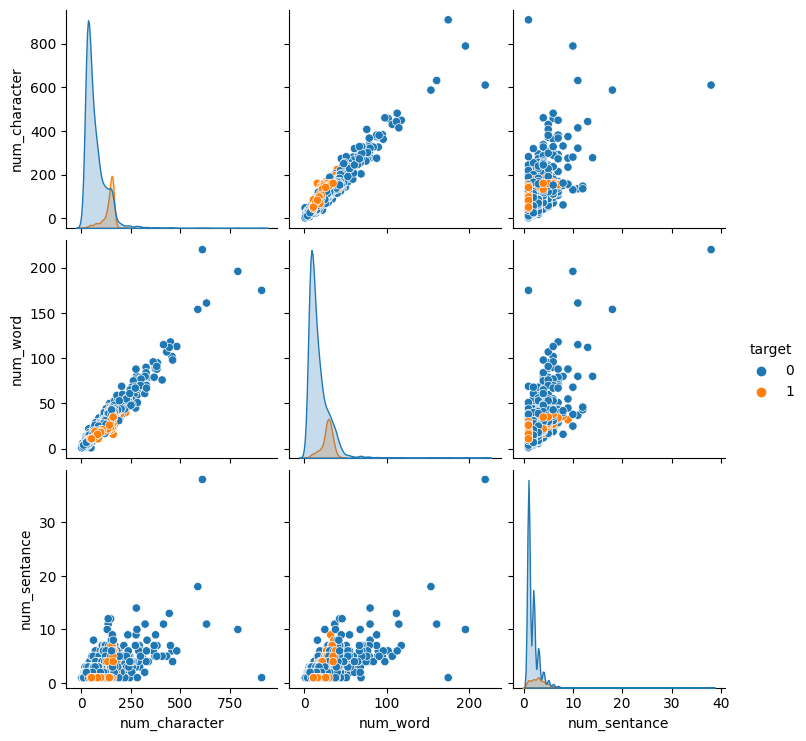

In [71]:
sns.pairplot(df,hue='target')

C:\Users\Kumari Anupriya\AppData\Local\Temp\ipykernel_8640\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

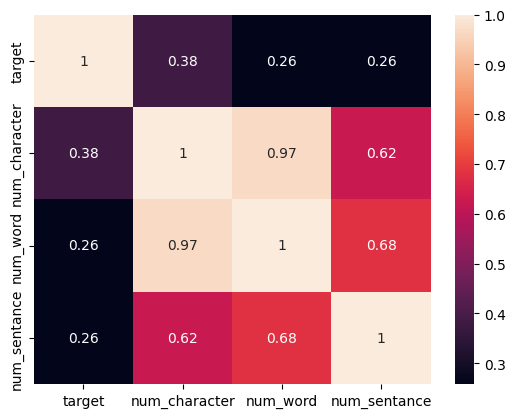

In [72]:
sns.heatmap(df.corr(),annot=True)

In [73]:
from nltk.corpus import stopwords

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [76]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [77]:
transform_text('hi my name is mishh lilli have you ever dancing %')

'hi name mishh lilli ever danc'

In [78]:
df['transform_text']=df['text'].apply(transform_text)

In [79]:
df.head()

,target,text,num_character,num_word,num_sentance,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
import wordcloud
from wordcloud import WordCloud
wc= WordCloud(width=50,height=500,min_font_size=10,background_color='white')

In [81]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

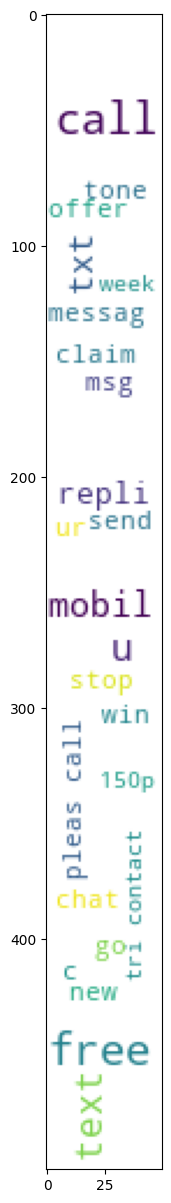

In [82]:
plt.figure(figsize=(6,15))
plt.imshow(spam_wc)

In [83]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [84]:
len(spam_corpus)

10011

# MODEL BUILDING

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [86]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [87]:
X.shape

(5180, 3000)

In [88]:
y=df['target'].values

In [89]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8513513513513513
[[778 125]
 [ 29 104]]
0.45414847161572053


In [95]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700772200772201
[[903   0]
 [ 31 102]]
1.0


In [96]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787644787644788
[[901   2]
 [ 20 113]]
0.9826086956521739


# pipelining

In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))